<a href="https://colab.research.google.com/github/Roshano1/AnalystPortfolio.github.io/blob/main/Students_Exam_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/Students.csv.zip")
print (df.head(3))

   Unnamed: 0  Gender EthnicGroup         ParentEduc LunchType TestPrep  \
0           0  female         NaN  bachelor's degree  standard     none   
1           1  female     group C       some college  standard      NaN   
2           2  female     group B    master's degree  standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  


# Data Cleaning and processing

In [16]:
print(df.shape)

(30641, 15)


In [20]:
df.dropna(inplace=True)

In [21]:
df.drop_duplicates(inplace=True)

In [23]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
2           2  female     group B     master's degree      standard   
4           4    male     group C        some college      standard   
5           5  female     group B  associate's degree      standard   
6           6  female     group B        some college      standard   
7           7    male     group B        some college  free/reduced   

    TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2       none              single     sometimes          yes         4.0   
4       none             married     sometimes          yes         0.0   
5       none             married     regularly          yes         1.0   
6  completed             widowed         never           no         1.0   
7       none             married     sometimes          yes         1.0   

  TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
2     school_bus            < 5         87       

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19243 non-null  int64  
 1   Gender               19243 non-null  object 
 2   EthnicGroup          19243 non-null  object 
 3   ParentEduc           19243 non-null  object 
 4   LunchType            19243 non-null  object 
 5   TestPrep             19243 non-null  object 
 6   ParentMaritalStatus  19243 non-null  object 
 7   PracticeSport        19243 non-null  object 
 8   IsFirstChild         19243 non-null  object 
 9   NrSiblings           19243 non-null  float64
 10  TransportMeans       19243 non-null  object 
 11  WklyStudyHours       19243 non-null  object 
 12  MathScore            19243 non-null  int64  
 13  ReadingScore         19243 non-null  int64  
 14  WritingScore         19243 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [30]:
df.shape

(19243, 15)

In [31]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


## **Change weekly stydey hours column**

In [32]:
df["WklyStudyHours"]= df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


**Gender distribution** *italicized text*

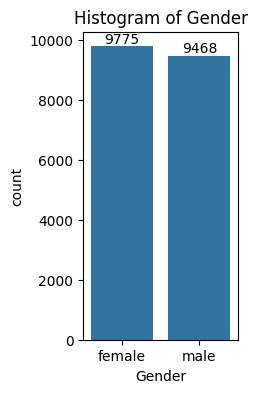

In [49]:
plt.figure(figsize = (2,4))
rh = sns.countplot(data = df, x= "Gender")
rh.bar_label(rh.containers[0])
plt.xlabel('Gender')
plt.title('Histogram of Gender')
plt.show()

In [51]:
gb = df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore": "mean", "WritingScore": 'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


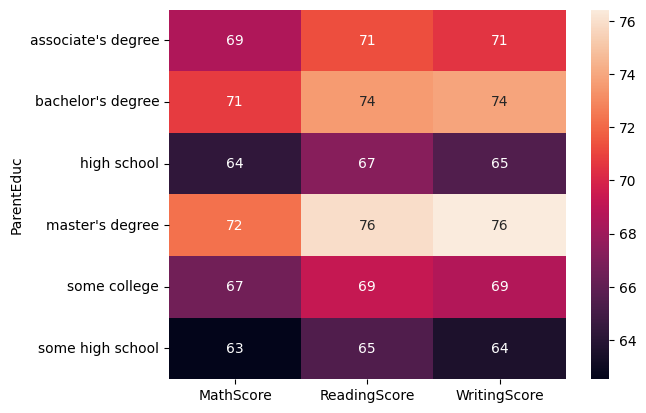

In [56]:
sns.heatmap(gb, annot = True)
plt.show()

In [57]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean', "ReadingScore": "mean", "WritingScore": 'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


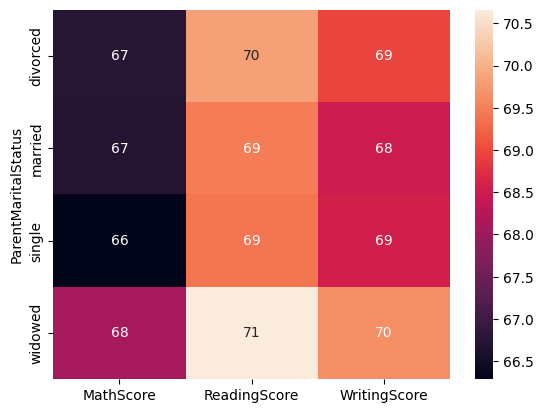

In [58]:
sns.heatmap(gb1, annot = True)
plt.show()

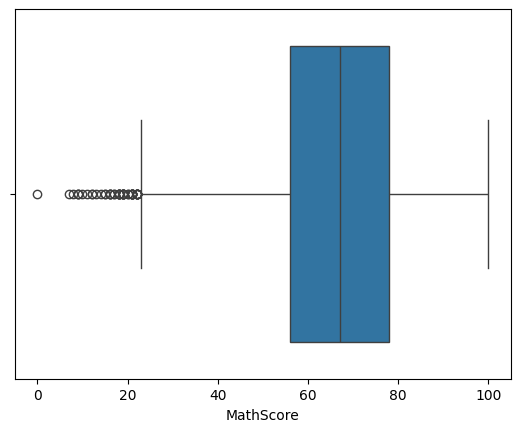

In [59]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

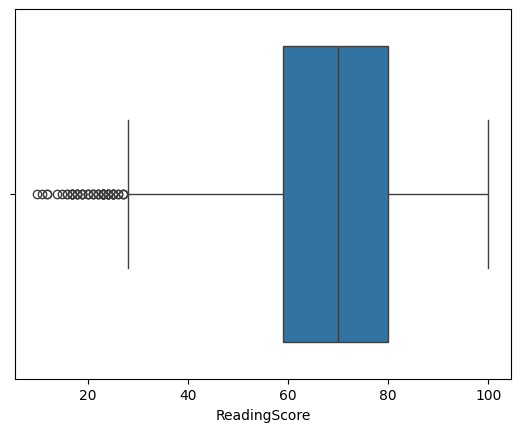

In [61]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

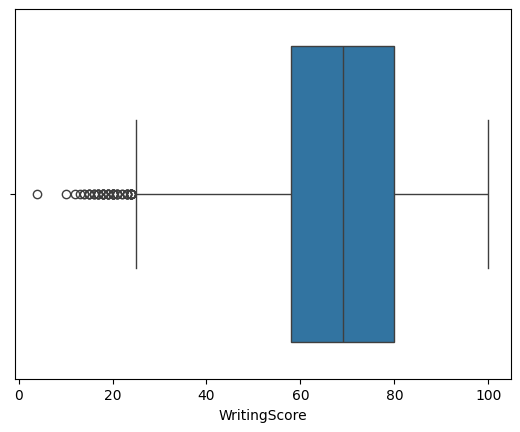

In [62]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [63]:
print(df["EthnicGroup"].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


In [67]:
groupA = df.loc[df['EthnicGroup'] == ("group A")].count()
groupB = df.loc[df['EthnicGroup'] == ("group B")].count()
groupC = df.loc[df['EthnicGroup'] == ("group C")].count()
groupD = df.loc[df['EthnicGroup'] == ("group D")].count()
groupE = df.loc[df['EthnicGroup'] == ("group E")].count()
print(groupA['EthnicGroup'])

1465


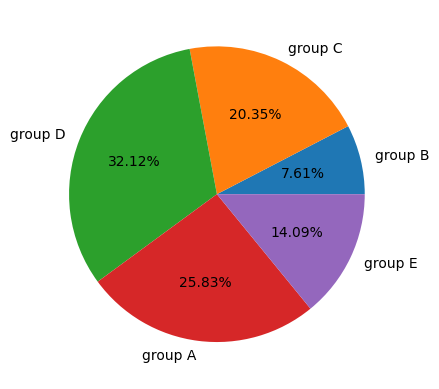

In [76]:
l = ['group B','group C','group D' ,'group A' ,'group E']
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show()

[Text(0, 0, '3915'),
 Text(0, 0, '6181'),
 Text(0, 0, '4970'),
 Text(0, 0, '1465'),
 Text(0, 0, '2712')]

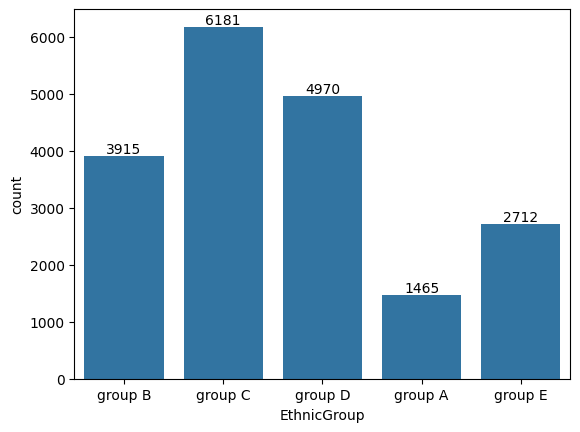

In [78]:
rh = sns.countplot(data = df, x ='EthnicGroup')
rh.bar_label(rh.containers[0])